In [ ]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# The train_df is already defined and loaded as your DataFrame
X = train_df.drop(['SalePrice', 'Id'], axis=1)
y = np.log(train_df['SalePrice'])  # Log transformation of the target variable

# Define preprocessor as previously described
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest Model Pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# XGBoost Model Pipeline
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))])

# Train RandomForest Model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

# Train XGBoost Model
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))

# Print RMSE for both models
print(f"RandomForest RMSE: {rmse_rf}")
print(f"XGBoost RMSE: {rmse_xgb}")




RandomForest RMSE: 0.14645099655259794
XGBoost RMSE: 0.14804085412881332


In [ ]:
# You can follow up with a GridSearchCV for hyperparameter tuning as previously described for each model

# Define the parameter grid for RandomForest
param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5,
                              scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search_rf.fit(X_train, y_train)

# Best RandomForest model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best RandomForest model
y_pred_best_rf = best_rf_model.predict(X_val)
rmse_best_rf = np.sqrt(mean_squared_error(y_val, y_pred_best_rf))
print(f"Best RandomForest RMSE: {rmse_best_rf}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RandomForest RMSE: 0.14645099655259794


In [ ]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [6, 10],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__subsample': [0.8, 1.0]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5,
                               scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search_xgb.fit(X_train, y_train)

# Best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_val)
rmse_best_xgb = np.sqrt(mean_squared_error(y_val, y_pred_best_xgb))
print(f"Best XGBoost RMSE: {rmse_best_xgb}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
# Best models for RandomForest and XGBoost models trained with the best parameters

# Preprocess the test dataset (this is handled automatically by the pipeline)
X_test = test_df.drop(['Id'], axis=1)  # Ensure to drop the 'Id' column or any other non-feature column

# Predictions with RandomForest
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_pred_actual_rf = np.exp(y_test_pred_rf)  # Inverse of log transformation

# Predictions with XGBoost
y_test_pred_xgb = best_xgb_model.predict(X_test)
y_test_pred_actual_xgb = np.exp(y_test_pred_xgb)  # Inverse of log transformation

# Prepare submission files
# RandomForest Submission
submission_rf = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_test_pred_actual_rf
})
submission_file_path_rf = '/content/submission_rf.csv'
submission_rf.to_csv(submission_file_path_rf, index=False)

# XGBoost Submission
submission_xgb = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_test_pred_actual_xgb
})
submission_file_path_xgb = '/content/submission_xgbv2.csv'
submission_xgb.to_csv(submission_file_path_xgb, index=False)

# Output paths for submission files
print("Submission file paths:")
print("RandomForest:", submission_file_path_rf)
print("XGBoost:", submission_file_path_xgb)


Submission file paths:
RandomForest: /content/submission_rf.csv
XGBoost: /content/submission_xgbv2.csv


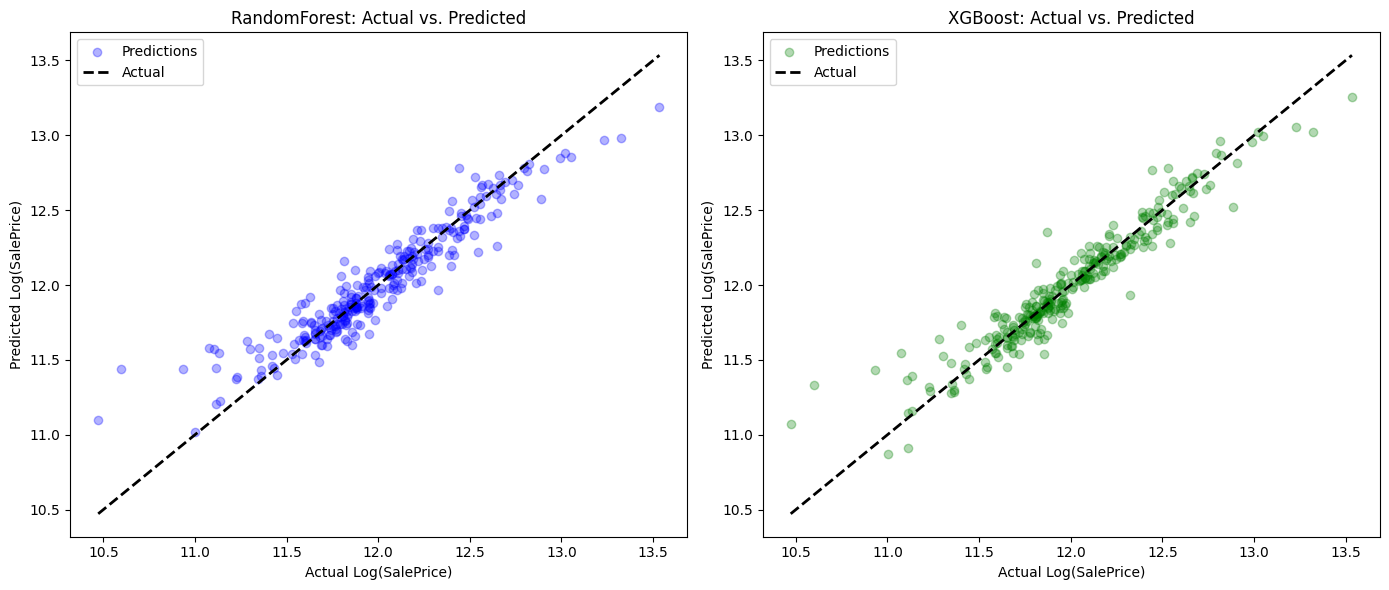

Submission files saved: 
RandomForest: submission_rf.csv
XGBoost: submission_xgbv2.csv


In [ ]:
# Preparing the test data (dropping 'Id' as done with training data)
X_test = test_df.drop('Id', axis=1)

# Generate predictions for both models on the test data
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Revert the log transformation for final sale price predictions
y_test_pred_actual_rf = np.exp(y_test_pred_rf)
y_test_pred_actual_xgb = np.exp(y_test_pred_xgb)

# Prepare CSV submission files
submission_rf = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_test_pred_actual_rf})
submission_xgb = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_test_pred_actual_xgb})

# Define submission file paths
submission_file_path_rf = 'submission_rf.csv'
submission_file_path_xgb = 'submission_xgbv2.csv'

# Save submission files
submission_rf.to_csv(submission_file_path_rf, index=False)
submission_xgb.to_csv(submission_file_path_xgb, index=False)

# Visualization of Actual vs. Predicted Sale Prices for both models
plt.figure(figsize=(14, 6))

# RandomForest
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_best_rf, alpha=0.3, color='blue', label='Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label='Actual')
plt.title('RandomForest: Actual vs. Predicted')
plt.xlabel('Actual Log(SalePrice)')
plt.ylabel('Predicted Log(SalePrice)')
plt.legend()

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_best_xgb, alpha=0.3, color='green', label='Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label='Actual')
plt.title('XGBoost: Actual vs. Predicted')
plt.xlabel('Actual Log(SalePrice)')
plt.ylabel('Predicted Log(SalePrice)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Submission files saved: \nRandomForest: {submission_file_path_rf}\nXGBoost: {submission_file_path_xgb}")
